In [1]:
from keras.datasets import mnist
import numpy as np
import sympy as sym

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [2]:
#
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(10000, 28, 28)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0 

In [4]:
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

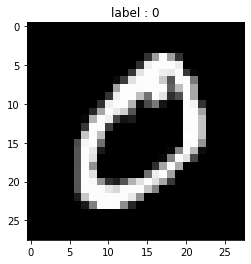

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
index = 1
image = X_train[index].reshape(28,28)
# X_train[index]: (784,)
# image: (28, 28)
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()

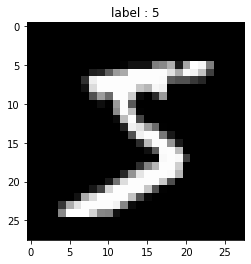

[[-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35
  -105.35]
 [-105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -105.35 -1

In [6]:
index = 0
image = X_train[index].reshape(28,28)
image = image.astype(np.float) # float型に変換
image -= 105.35 # 意図的に負の小数値を作り出してみる
plt.imshow(image, 'gray')
plt.title('label : {}'.format(y_train[index]))
plt.show()
print(image) # 値を確認

# plt.imshowには自動的に0~255に変換してくれてる（そもそもuintなのでそのままだとエラー）

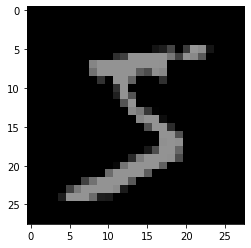

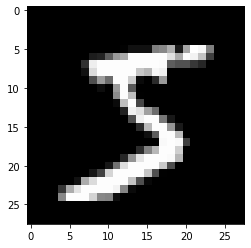

In [7]:
# 何故？
plt.imshow(image, 'gray', vmin = 0, vmax = 255)
plt.show()

# 元々マイナスの数字なので、範囲が-105~145だが
#0~255にするので、色の情報を失っている可能性あり


plt.imshow(image, 'gray', vmin = -105, vmax = 150)
plt.show()

In [8]:
# 前処理
# DLでは0~1しか扱わないので画像データmaxの255でデータを割る
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)

X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [9]:
# one-hot変換
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 784)
(12000, 784)


In [11]:
# ３層のネットワークをここで作る
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, verbose = True):
        self.verbose = verbose
        pass
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
            print()
        pass
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        pass
        return

In [12]:
# ミニバッチ
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ
    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      訓練データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 20, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self._X = X[shuffle_index]
        self._y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self._X[p0:p1], self._y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self._X[p0:p1], self._y[p0:p1]

In [13]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    # このfor文内でミニバッチが使える
    pass

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([4, 1, 6, 2, 6, 5, 2, 6, 9, 0, 8, 7, 5, 0, 5, 7, 9, 5, 6, 3],
      dtype=uint8))


# 【問題1】重みの初期値を決めるコードの作成
ニューラルネットワークの各層の重みの初期値を決めるコードを作成してください。


重みの初期値は様々な方法が提案されていますが、今回はガウス分布による単純な初期化を行います。バイアスに関しても同様です。


以下のコードを参考にしてください。標準偏差の値sigmaはハイパーパラメータです。発展的な重みの初期化方法については次のSprintで扱います。

In [14]:
n_features = 784
n_nodes1 = 400
sigma = 0.01 # ガウス分布の標準偏差

# 重みの初期値
W1 = sigma * np.random.randn(n_features, n_nodes1)
# W1: (784, 400)

n_nodes2 = 200 # 自由(理由なし)
W2 = sigma * np.random.randn(n_nodes1, n_nodes2)
# W2: (400, 200)

# バイアス
bias1 = sigma * np.random.randn(n_features, n_nodes1)
# baias1：（784, 400）

bias2 = sigma * np.random.randn(n_nodes1, n_nodes1)
# baias2：（400, 200）

# 【問題2】フォワードプロパゲーションの実装
三層のニューラルネットワークの フォワードプロパゲーション を作成してください。以下の説明ではノード数は1層目は400、2層目は200としますが、変更しても構いません。


各層の数式を以下に示します。今回はそれぞれの記号が表す配列が、実装上どのようなndarrayのshapeになるかを併記してあります。

In [26]:
# ３層のネットワークをここで作る
class ScratchSimpleNeuralNetrowkClassifier():
    """
    シンプルな三層ニューラルネットワーク分類器
    Parameters
    ----------
    Attributes
    ----------
    """
    def __init__(self, sigma, n_nodes1, n_nodes2,n_output,batch_size, epoch, verbose = False):
        self.verbose = verbose
        self.sigma = sigma # ガウス分布の標準偏差
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.batch_size = batch_size
        self.epoch = epoch
        self.n_output = n_output
        self.W1 = self.sigma * np.random.randn(n_features, self.n_nodes1)# W1: (784, 400)
        self.W2 = self.sigma * np.random.randn(self.n_nodes1, self.n_nodes2) # (400, 200)
        self.W3 =  self.sigma * np.random.randn(self.n_nodes2, self.n_output) #(200, 10)
        self.bias1 = self.sigma * np.random.randn(self.n_nodes1) # baias1：（784,）
        self.bias3 = self.sigma * np.random.randn(self.n_output) # (10,)
        self.bias2 = self.sigma * np.random.randn(self.n_nodes2) # 
        self.train_score_list =[]
        self.val_score_list = []
        self.train_loss_list = []
        self.val_loss_list = []
    
    def fit(self, X, y, X_val=None, y_val=None):
        """
        ニューラルネットワーク分類器を学習する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        
        #n_features = X.shape[1] #(784)
         
                
        # ワンホット（ブロードキャスト版）
        y_one_hot = y.reshape(-1,1) == np.arange(10) # (48000, 10)
        y_val_one_hot = y_val.reshape(-1,1) == np.arange(10) # (12000, 10)
        
        
        # エポックで学習
        for epoch in range(self.epoch):
            train_loss = 0
            get_mini_batch = GetMiniBatch(X, y_one_hot, batch_size=self.batch_size)
            # イテレーション
            for mini_X_train, mini_y_train in get_mini_batch: # バッチサイズ20なら2400回繰り返し
                self.forward(mini_X_train)
                train_loss += self.log_loss(mini_X_train, mini_y_train)
                self.back_propagation(mini_X_train, mini_y_train, alpha=0.01)
           
            # 問題6 accuracyのスコア
            train_score = len(self.predict(X)[self.predict(X) == y]) / len(y)
            self.train_score_list.append(train_score)
            train_loss = train_loss/ len(get_mini_batch)
            self.train_loss_list.append(train_loss)
            
            if self.verbose:
            #verboseをTrueにした際は学習過程などを出力する
                print("train loss {}, train_score{}".format(train_loss,train_score))

            
        if X_val is not None and y_val is not None:
            for epoch in range(self.epoch):
                val_loss = 0
                get_mini_batch = GetMiniBatch(X_val, y_val_one_hot, batch_size=self.batch_size)
                for mini_X_train, mini_y_train in get_mini_batch:
                    self.forward(mini_X_train)
                    val_loss += self.log_loss(mini_X_train, mini_y_train)
                    self.back_propagation(mini_X_train, mini_y_train, alpha=0.01)
            
                val_score = len(self.predict(X_val)[self.predict(X_val) == y_val]) / len(y_val)
                self.val_score_list.append(val_score)
                val_loss = val_loss / len(get_mini_batch)
                self.val_loss_list.append(val_loss)
            
                if self.verbose:
                #verboseをTrueにした際は学習過程などを出力する
                    print("val loss {}, val_score{}".format(val_loss, val_score))
            
                
    
    # 問題5
    def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        return np.argmax(self.forward(X), axis=1)
   

    # 問題2 
    def forward(self, X):
        self.a1 = X@self.W1 + self.bias1 #((20, 784), (784, 400)) + (400, ) (20, 400)
        self.Z1 =  self.sigmoid(self.a1) 
        self.a2 = self.Z1@self.W2 + self.bias2 # (20, 400) (400, 200) + (200,) (20,200)
        self.Z2 = np.tanh(self.a2)    
        self.a3 = self.Z2@self.W3 + self.bias3  #  (20,200) (200,10)  + (10,) (20,10)
        self.Z3= self.soft_max(self.a3) # (20,10) 
        return self.Z3
        
    # シグモイド関数
    def sigmoid(self, X):
        return 1/(1 + np.exp(-X))
    
    # ソフトマックス関数
    def soft_max(self, X):
        # オーバーフロー対策 
        X_max = np.max(X) # (20,10)
        return np.exp(X - X_max)/ np.sum(np.exp(X - X_max), axis=1, keepdims=True)
        
   # 問題3
    def log_loss(self, X, y):
        #y = (20, ) 
        # output_layer = (20,10) 
        self.loss = -(1/self.batch_size) * np.sum(y*np.log(self.forward(X)))
        return self.loss
    
    # 問題4 
    def back_propagation(self, X, y, alpha):
        # Z = sotmax(A) (20,10)
        # A = zx+b (20,10)
        # ３層
        delta_A3 = (1/self.batch_size)*(self.Z3 - y) # (20,10) (20, 10)
        self.bias3 -= alpha * np.sum(delta_A3, axis=0) # (10,)
        self.W3 -= alpha * self.Z2.T@delta_A3 # (200,20) (20,10) (200,10)
        delta_Z2 = delta_A3@self.W3.T # (20,10) (10,200) (20,200)
        
        # ２層 
        delta_A2 = delta_Z2*(1 - (self.Z2**2)) #(20,200) (20,200)
        self.bias2 -= alpha * np.sum(delta_A2, axis=0) # (200,)
        self.W2 -= alpha * self.Z1.T@delta_A2 # (400,20) (20,200) (400,200) 
        delta_Z1 = delta_A2@self.W2.T # (20,200) (200, 400) (20,400)
        
        #1層
        # シグモイドの微分
        delta_A1 = delta_Z1 * (1-self.Z1)*self.Z1 # (20,400) 
        self.bias1 -= alpha * np.sum(delta_A1, axis=0) # (400,)
        self.W1 -= alpha * X.T@delta_A1 # (784, 20) (20,400) (784, 400)       

In [16]:
X_test.shape
y_test.shape

(10000,)

In [28]:
from sklearn.metrics import accuracy_score
nn = ScratchSimpleNeuralNetrowkClassifier(sigma=0.01, n_nodes1=400, n_nodes2=200,n_output=10,batch_size=20, epoch=30, verbose=True)
nn.fit(X_train, y_train, X_test, y_test)

train loss 2.2992312037627447, train_score0.23510416666666667
train loss 2.223309200157625, train_score0.3470416666666667
train loss 1.3215123453880833, train_score0.7014791666666667
train loss 0.7798981645024985, train_score0.7930625
train loss 0.6130914190257762, train_score0.8371666666666666
train loss 0.5301040502480712, train_score0.8554791666666667
train loss 0.47812802961289547, train_score0.8726041666666666
train loss 0.4302968885247707, train_score0.8840833333333333
train loss 0.3984892288462972, train_score0.8914166666666666
train loss 0.37723641570344846, train_score0.8966875
train loss 0.35992122753839106, train_score0.901125
train loss 0.34548824897680624, train_score0.9043125
train loss 0.3337522086729263, train_score0.90725
train loss 0.3240272739646914, train_score0.9100208333333333
train loss 0.31555005421184906, train_score0.9122916666666666
train loss 0.30773946878823166, train_score0.9143958333333333
train loss 0.30020103619270994, train_score0.91675
train loss 0.29

In [29]:
a = nn.predict(X_test)
print(a)
print(len(a[a == y_test]) / len(X_test))
y_test.shape

[7 2 1 ... 4 5 6]
0.9571


(10000,)

In [30]:
get_mini_batch = GetMiniBatch(X_train, y_train, batch_size=20)
print(len(get_mini_batch)) # 2400
print(get_mini_batch[5]) # 5番目のミニバッチが取得できる
for mini_X_train, mini_y_train in get_mini_batch:
    pass

# バッチサイズの20個を60000件の中から１個取り出している(max3000個)
get_mini_batch[0][0].shape, W1.shape

2400
(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([4, 1, 6, 2, 6, 5, 2, 6, 9, 0, 8, 7, 5, 0, 5, 7, 9, 5, 6, 3],
      dtype=uint8))


((20, 784), (784, 400))

In [31]:
(get_mini_batch[0][0]@W1).shape

(20, 400)

In [32]:
bias1 = np.zeros((n_nodes1))
#get_mini_batch[0][0]@bias1
get_mini_batch[0][0].shape, bias1.shape

(get_mini_batch[0][0]).shape
((get_mini_batch[0][0]@W1) + bias1).shape

(20, 400)

In [33]:
nn = (get_mini_batch[0][0]@W1) + bias1
np.tanh(nn).shape

(20, 400)

In [34]:
for k in range(10):
    np.exp(X_train[:, k])/ np.sum(np.exp(X_train))

In [35]:
np.exp(X_train[:, 1]).shape

(48000,)

In [36]:
np.exp(X_train).shape
#20,10

(48000, 784)

In [37]:
np.sum(np.exp(X_train))

45474167.09579028

In [38]:
(np.exp(X_train)/np.sum(np.exp(X_train)))

array([[2.19905072e-08, 2.19905072e-08, 2.19905072e-08, ...,
        2.19905072e-08, 2.19905072e-08, 2.19905072e-08],
       [2.19905072e-08, 2.19905072e-08, 2.19905072e-08, ...,
        2.19905072e-08, 2.19905072e-08, 2.19905072e-08],
       [2.19905072e-08, 2.19905072e-08, 2.19905072e-08, ...,
        2.19905072e-08, 2.19905072e-08, 2.19905072e-08],
       ...,
       [2.19905072e-08, 2.19905072e-08, 2.19905072e-08, ...,
        2.19905072e-08, 2.19905072e-08, 2.19905072e-08],
       [2.19905072e-08, 2.19905072e-08, 2.19905072e-08, ...,
        2.19905072e-08, 2.19905072e-08, 2.19905072e-08],
       [2.19905072e-08, 2.19905072e-08, 2.19905072e-08, ...,
        2.19905072e-08, 2.19905072e-08, 2.19905072e-08]])

In [39]:
(np.exp(X_train)/np.sum(np.exp(X_train), axis=0)).shape

(48000, 784)

In [40]:
np.log(np.exp(X_train)).shape

(48000, 784)

In [41]:
# 平滑化
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)
X_train.shape, X_test.shape

((48000, 784), (10000, 784))

In [42]:
y_train.reshape(-1,1) == np.arange(10)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [43]:
a = np.zeros((20, 10))
log = np.zeros((20,10))
np.random.randn(200, 10)

array([[ 0.79254585, -0.14509158, -1.28713287, ..., -2.81962169,
        -1.14406001,  1.47568564],
       [-1.32275668,  1.60840454,  1.18336099, ...,  0.67863041,
         1.51854652, -0.70275234],
       [ 0.44494317, -1.38090756,  0.34876935, ..., -0.4658047 ,
         0.50559737,  0.89300135],
       ...,
       [-0.43481017, -0.22796111,  1.54043006, ...,  1.46430167,
         1.25701103,  1.86759362],
       [-0.14210812, -3.07987899, -0.32067736, ..., -0.53407238,
         0.28473852, -1.91870176],
       [-0.4993296 ,  0.47490048,  0.56264197, ..., -0.02634771,
         0.22502908,  0.98097986]])

In [44]:
np.exp(X - X_max)/ np.sum(np.exp(X - X_max), axis=0)

NameError: name 'X' is not defined

In [45]:
(np.zeros((20,10))/20).shape

(20, 10)

In [46]:
np.sum((2 / np.zeros((20,10))), axis=0).shape

<ipython-input-46-8d51c995a679>:1: RuntimeWarning: divide by zero encountered in true_divide
  np.sum((2 / np.zeros((20,10))), axis=0).shape


(10,)

In [47]:
np.argmax(X_test, axis=1)

#np.argmax(self.foward(X), axis=0)

array([355,  97, 406, ..., 711, 464,  75])

# 【問題3】交差エントロピー誤差の実装
目的関数（損失関数）を作成します。


多クラス分類の目的関数である交差エントロピー誤差 
L
 は次の数式です。

In [48]:
 # 問題3
def log_loss(self, X, y):
    #y = (20, ) 
    # output_layer = (20,10) 
    self.loss = -(1/self.batch_size) * np.sum(y*np.log(self.forward(X)))
    return self.loss
    
   

# 【問題4】バックプロパゲーションの実装
三層のニューラルネットワークのバックプロパゲーションを作成してください。確率的勾配降下法を行う部分です。


数式を以下に示します。


まず、i層目の重みとバイアスの更新式です。 
W
i
 と 
B
i
 に対し、更新後の 
W
′
i
 と 
B
′
i
 は次の数式で求められます。




In [49]:
 # 問題4 
def back_propagation(self, X, y, alpha):
    # Z = sotmax(A) (20,10)
    # A = zx+b (20,10)
    # ３層
    delta_A3 = (1/self.batch_size)*(self.Z3 - y) # (20,10) (20, 10)
    self.bias3 -= alpha * np.sum(delta_A3, axis=0) # (10,)
    self.W3 -= alpha * self.Z2.T@delta_A3 # (200,20) (20,10) (200,10)
    delta_Z2 = delta_A3@self.W3.T # (20,10) (10,200) (20,200)
        
    # ２層 
    delta_A2 = delta_Z2*(1 - (self.Z2**2)) #(20,200) (20,200)
    self.bias2 -= alpha * np.sum(delta_A2, axis=0) # (200,)
    self.W2 -= alpha * self.Z1.T@delta_A2 # (400,20) (20,200) (400,200) 
    delta_Z1 = delta_A2@self.W2.T # (20,200) (200, 400) (20,400)
        
    #1層
    # シグモイドの微分
    delta_A1 = delta_Z1 * (1-self.Z1)*self.Z1 # (20,400) 
    self.bias1 -= alpha * np.sum(delta_A1, axis=0) # (400,)
    self.W1 -= alpha * X.T@delta_A1 # (784, 20) (20,400) (784, 400)

# 【問題5】推定
推定を行うメソッドを作成してください。


フォワードプロパゲーションによって出力された10個の確率の中で、最も高いものはどれかを判定します。



In [50]:
def predict(self, X):
        """
        ニューラルネットワーク分類器を使い推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            推定結果
        """
        return np.argmax(self.forward(X), axis=1)

# 【問題6】学習と推定
MNISTのデータを学習・推定し、Accuracyを計算してください。



In [53]:
from sklearn.metrics import accuracy_score
nn = ScratchSimpleNeuralNetrowkClassifier(sigma=0.01, n_nodes1=400, n_nodes2=200,n_output=10,batch_size=20, epoch=30, verbose=True)
nn.fit(X_train, y_train, X_test, y_test)

train loss 2.299240577180339, train_score0.10391666666666667
train loss 2.200932481321529, train_score0.3679791666666667
train loss 1.3155192218453537, train_score0.6859375
train loss 0.8033320589912045, train_score0.7790833333333333
train loss 0.6321418364639254, train_score0.8339166666666666
train loss 0.5328054276589469, train_score0.8575625
train loss 0.46709195747024085, train_score0.8765208333333333
train loss 0.41952215012561617, train_score0.8861041666666667
train loss 0.39047992167144374, train_score0.8932083333333334
train loss 0.36961050261507084, train_score0.8988541666666666
train loss 0.3535688376887054, train_score0.9023125
train loss 0.3411305453047734, train_score0.9052708333333334
train loss 0.3310593724481137, train_score0.9083125
train loss 0.3224257241641212, train_score0.9104375
train loss 0.31461689833536705, train_score0.912125
train loss 0.3072217651969324, train_score0.9143125
train loss 0.299969660236312, train_score0.9163125
train loss 0.292702030733571, tra

# 【問題7】学習曲線のプロット
学習曲線をプロットしてください。


ニューラルネットワークは過学習が発生しやすいため、学習曲線の確認が重要です。訓練データと検証データに対するエポックごとの損失（交差エントロピー誤差）を記録できるようにする必要があります。

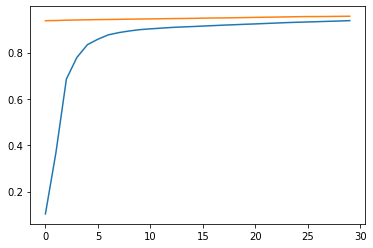

In [54]:
# accuracyスコア
import matplotlib.pyplot as plt

epoch = 30
plt.plot(np.arange(epoch), nn.train_score_list)
plt.plot(np.arange(epoch), nn.val_score_list)

#train_score_list =[]
#val_score_list = []
#train_loss_list = [
#val_loss_list = []

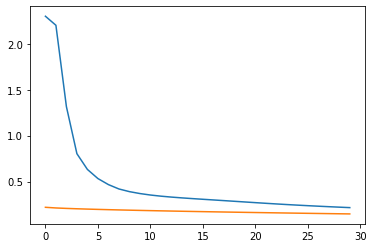

In [55]:
# trainデータ
epoch = 30

plt.plot(np.arange(epoch), nn.train_loss_list)
plt.plot(np.arange(epoch), nn.val_loss_list)

In [ ]:
# 考察
# valでもepochを回しているので、スタートからlossは低い状態
# 最近ではvalで最適化することもあるため、今回はそちらを採用